## Importing the required module

In [1]:
import cv2         #for image processing
import easygui     #to open the filebox to upload images from the local system
import numpy as np #to store image in the form of arrays
import imageio     #to read image stored at particular path
import sys
import matplotlib.pyplot as plt    #used for plotting images using matplotlib
import os          #used for reading and saving images to the path
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image


In [2]:
from tkinter import messagebox   #used to display message box 

## Making the main window

In [3]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image!')
top.configure(background='azure4')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

## Building a File Box to choose a particular file

In [4]:
""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

## Storing the image and Transforming an image to different forms

In [5]:
def cartoonify(ImagePath):
    #read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers
    ReSized1 = cv2.resize(originalmage, (400, 400))

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    elif(originalmage is not None):
        #converting an image to grayscale
        grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
        ReSized2 = cv2.resize(grayScaleImage, (400, 400))
        #plt.imshow(ReSized2, cmap='gray')
            
    #Smoothening a grayscale image applying median blur
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (400, 400))
    #plt.imshow(ReSized3, cmap='gray')\
    
    #Retrieving the edges of an image f
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    #or
                                    #cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (400, 400))
    #plt.imshow(ReSized4, cmap='gray')
    
    #Preparing a Mask Image
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 8, 300, 300)
    ReSized5 = cv2.resize(colorImage, (400, 400))
    #plt.imshow(ReSized5, cmap='gray')
    
    #Giving a Cartoon Effect
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (400, 400))
    #plt.imshow(ReSized6, cmap='gray')
    
    #Plotting all the transitions together
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    #Making a Save button in the main window
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#FFFF00', foreground='black',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)

    plt.show()

## Functionally of save button

In [6]:
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    messagebox.showinfo(title=None, message=I)

## Making the Cartoonify button in the main window

In [7]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#FFFF00', foreground='black',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)


## Main function to build the tkinter window

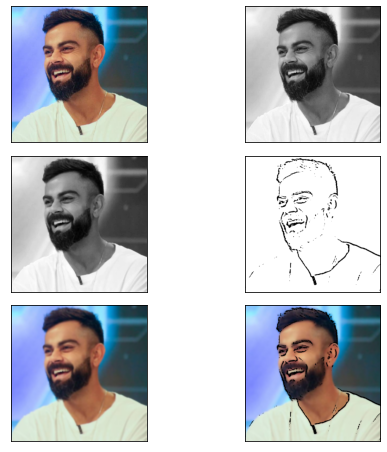

In [8]:
top.mainloop()